In [ ]:
!gdown https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC
!unzip /content/clothing-dataset-small.zip 


Downloading...
From: https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC
To: /content/clothing-dataset-small.zip
100% 106M/106M [00:00<00:00, 205MB/s] 
Archive:  /content/clothing-dataset-small.zip
   creating: clothing-dataset-small/
  inflating: clothing-dataset-small/.DS_Store  
   creating: clothing-dataset-small/test/
   creating: clothing-dataset-small/test/skirt/
  inflating: clothing-dataset-small/test/skirt/f4b934fc-e326-4f72-b535-53288b8b82d3.jpg  
  inflating: clothing-dataset-small/test/skirt/491982c3-3e90-431e-99e6-b14ecea36384.jpg  
  inflating: clothing-dataset-small/test/skirt/24963db3-649c-4f04-8da3-0375ede8e0a6.jpg  
  inflating: clothing-dataset-small/test/skirt/32b99302-cec7-4dec-adfa-3d4029674209.jpg  
  inflating: clothing-dataset-small/test/skirt/0558b2c5-be00-49de-b27f-8c88114ac36f.jpg  
  inflating: clothing-dataset-small/test/skirt/95e66e02-b4ed-4fe9-b538-db6bac4fb7df.jpg  
  inflating: clothing-dataset-small/test/skirt/2001dec1-1e0a-4c11-9d15-120

In [ ]:
import os
import glob
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.keras.utils.set_random_seed(111)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
class_dirs = os.listdir('clothing-dataset-small/train')
class_dirs

['t-shirt',
 'shoes',
 'skirt',
 'pants',
 'shorts',
 'shirt',
 'longsleeve',
 'hat',
 'dress',
 'outwear']

In [ ]:
image_dict = {}
count_dict = {}
image_dict

{}

In [ ]:
for cls in class_dirs:
  print(cls)

t-shirt
shoes
skirt
pants
shorts
shirt
longsleeve
hat
dress
outwear


In [ ]:
for cls in class_dirs:
  print(cls)
  file_path = glob.glob(f'clothing-dataset-small/train/{cls}/*')
  print(len(file_path))
  count_dict[cls] = len(file_path)
count_dict

t-shirt
795
shoes
198
skirt
112
pants
468
shorts
202
shirt
290
longsleeve
455
hat
123
dress
241
outwear
184


{'t-shirt': 795,
 'shoes': 198,
 'skirt': 112,
 'pants': 468,
 'shorts': 202,
 'shirt': 290,
 'longsleeve': 455,
 'hat': 123,
 'dress': 241,
 'outwear': 184}

In [ ]:
len(file_path)

184

In [ ]:
import random

mylist = ["apple", "banana", "cherry"]

print(random.choice(mylist))

apple


In [ ]:
image_path = random.choice(file_path)

In [ ]:
image_path

'clothing-dataset-small/train/outwear/3d7a04ef-f6c9-4461-9db2-b2c87b3aa481.jpg'

In [ ]:
image_dict[cls] = tf.keras.utils.load_img(image_path)
image_dict

{'outwear': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x568 at 0x7FF8D2798590>}

In [ ]:
class_dirs = os.listdir("clothing-dataset-small/train") # list all directories inside "train" folder
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)
# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'clothing-dataset-small/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)
file_paths

['clothing-dataset-small/train/outwear/e51ccda8-218f-418a-83dd-bc47561ebe44.jpg',
 'clothing-dataset-small/train/outwear/90ff3bb7-d6b5-4b77-998a-d64543128c00.jpg',
 'clothing-dataset-small/train/outwear/c1a6e7af-4bad-425a-b7b7-caca5b6a35dd.jpg',
 'clothing-dataset-small/train/outwear/369fa09e-1fdd-4844-8814-fb1e18ace137.jpg',
 'clothing-dataset-small/train/outwear/bf0a5434-a9ee-4f3e-83ea-139fb18d733c.jpg',
 'clothing-dataset-small/train/outwear/1d419bc1-c0a7-40b3-b0c3-c36bc62a0f47.jpg',
 'clothing-dataset-small/train/outwear/172a91db-cadc-4c64-85bb-4ac704ea686d.jpg',
 'clothing-dataset-small/train/outwear/5ecf5607-c36b-4185-9981-652804e04c8d.jpg',
 'clothing-dataset-small/train/outwear/356b217e-14c8-4b57-bd4e-9f4a90a50324.jpg',
 'clothing-dataset-small/train/outwear/a801e237-8e93-429c-8699-4952420f5415.jpg',
 'clothing-dataset-small/train/outwear/c7fed2fc-5dd4-4e43-a210-fce6c7e5c5eb.jpg',
 'clothing-dataset-small/train/outwear/b3636f9b-1219-4315-91ca-ca998675e262.jpg',
 'clothing-datas

In [ ]:
image_path

'clothing-dataset-small/train/outwear/26f59ad4-2bac-4f38-a695-ff82498ab97a.jpg'

In [ ]:
image_dict

{'t-shirt': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533 at 0x7FF8D271DB90>,
 'shoes': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x400 at 0x7FF8D271DC90>,
 'skirt': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533 at 0x7FF8D271DD90>,
 'pants': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533 at 0x7FF8D271DE90>,
 'shorts': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=533x400 at 0x7FF8D271DF90>,
 'shirt': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534 at 0x7FF8D27230D0>,
 'longsleeve': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533 at 0x7FF8D27231D0>,
 'hat': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x527 at 0x7FF8D27232D0>,
 'dress': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x711 at 0x7FF8D27233D0>,
 'outwear': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534 at 0x7FF8D27234D0>}

In [ ]:
image_dict.items()

dict_items([('t-shirt', <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533 at 0x7FF8D271DB90>), ('shoes', <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x400 at 0x7FF8D271DC90>), ('skirt', <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533 at 0x7FF8D271DD90>), ('pants', <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533 at 0x7FF8D271DE90>), ('shorts', <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=533x400 at 0x7FF8D271DF90>), ('shirt', <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534 at 0x7FF8D27230D0>), ('longsleeve', <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533 at 0x7FF8D27231D0>), ('hat', <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x527 at 0x7FF8D27232D0>), ('dress', <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x711 at 0x7FF8D27233D0>), ('outwear', <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534 at 0x7FF8D27234D0>)])

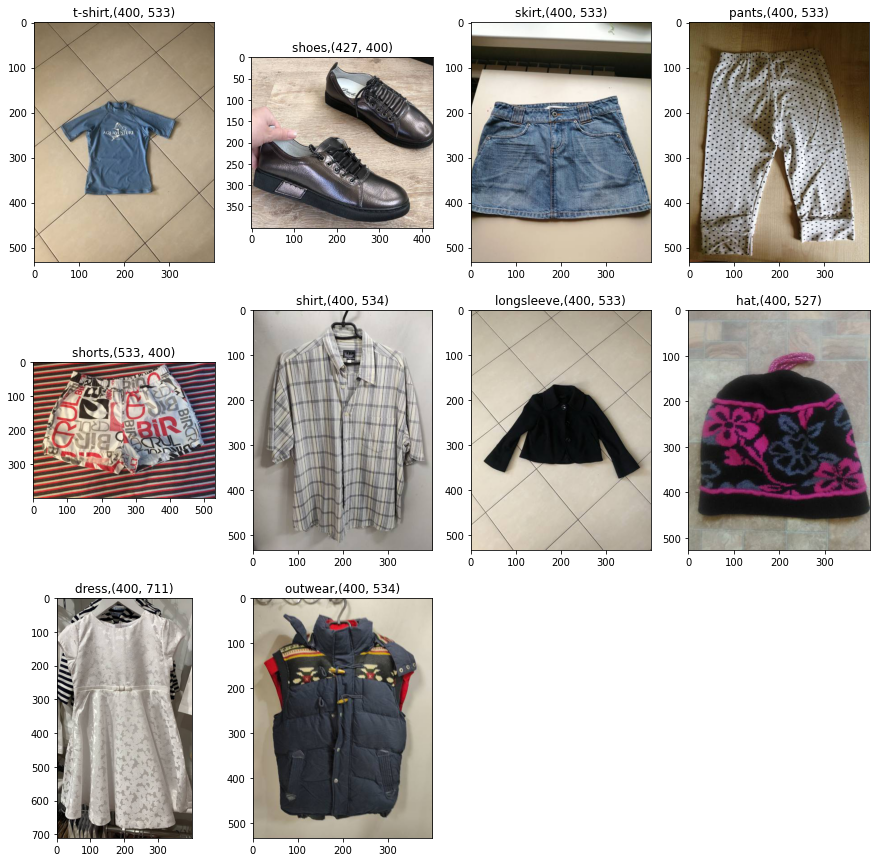

In [ ]:
plt.figure(figsize = (15,15))
for i,(cls,img) in enumerate(image_dict.items()):
  ax = plt.subplot(3,4,i+1)
  plt.imshow(img)
  plt.title('{},{}'.format(cls,img.size))

In [ ]:
print('\n loading train data....')
train_data = tf.keras.utils.image_dataset_from_directory('clothing-dataset-small/train',shuffle = True)

print('\n loading val data....')
val_data = tf.keras.utils.image_dataset_from_directory('clothing-dataset-small/validation',shuffle = False)

print('\n loading test data....')
test_data = tf.keras.utils.image_dataset_from_directory('clothing-dataset-small/test',shuffle = False)


 loading train data....
Found 3068 files belonging to 10 classes.

 loading val data....
Found 341 files belonging to 10 classes.

 loading test data....
Found 372 files belonging to 10 classes.


In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
height , width = 128,128

data_preprocess = keras.Sequential(
    name = 'data_preprocess',
    layers = [
        layers.Resizing(height,width),
        layers.Rescaling(1./255)
        
        
    ]
)

In [ ]:
train_ds = train_data.map(lambda x, y:(data_preprocess(x),y))
val_ds = val_data.map(lambda x, y:(data_preprocess(x),y))
test_ds = test_data.map(lambda x, y:(data_preprocess(x),y))

In [ ]:
sample = next(iter(train_ds))[0]

In [ ]:
sample

<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[0.09552696, 0.08768383, 0.09944853],
         [0.09552696, 0.08768383, 0.09944853],
         [0.10150483, 0.09366168, 0.10542639],
         ...,
         [0.14272474, 0.1348816 , 0.13880317],
         [0.1570357 , 0.14919256, 0.15311413],
         [0.14827092, 0.14042778, 0.14434935]],

        [[0.09485295, 0.08700981, 0.09877452],
         [0.09485295, 0.08700981, 0.09877452],
         [0.10283395, 0.09499081, 0.10675552],
         ...,
         [0.13454327, 0.12670013, 0.1306217 ],
         [0.16092996, 0.15308683, 0.1570084 ],
         [0.14812875, 0.14028561, 0.14420718]],

        [[0.10787031, 0.10002717, 0.11179188],
         [0.1098652 , 0.10202207, 0.11378677],
         [0.12568994, 0.11784681, 0.1296115 ],
         ...,
         [0.13711274, 0.1292696 , 0.13319117],
         [0.15016253, 0.1423194 , 0.14624096],
         [0.14482374, 0.13698061, 0.14090218]],

        ...,

        [[0.12977941, 0.12193628,

In [ ]:
num_classes  = 10
hidden_size_1 = 1024
hidden_size_2 = 256

model = keras.Sequential(
    name = 'model_ann',
    layers = [
        layers.Flatten(input_shape = (height,width,3)),
        layers.Dense(units = hidden_size_1,activation = 'relu'),
        layers.Dense(units = hidden_size_2,activation = 'relu'),
        layers.Dense(units = num_classes,activation = 'softmax'),


    ]
)

In [ ]:
model.summary()

Model: "model_ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 1024)              50332672  
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 50,597,642
Trainable params: 50,597,642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(128*128*3) 

49152


In [ ]:
print(49152*1024 + 1024) #params

50332672


In [ ]:
print(1024*256 + 256)

262400


In [ ]:
print(256*10 + 10)

2570


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
epochs = 20
model_fit = model.fit(train_ds,validation_data = val_ds,epochs = epochs)

Epoch 1/20
96/96 [==============================] - 12s 97ms/step - loss: 16.9757 - accuracy: 0.2331 - val_loss: 2.8198 - val_accuracy: 0.3783
Epoch 2/20
96/96 [==============================] - 13s 128ms/step - loss: 2.2655 - accuracy: 0.3755 - val_loss: 1.9529 - val_accuracy: 0.3900
Epoch 3/20
96/96 [==============================] - 7s 73ms/step - loss: 2.0506 - accuracy: 0.3862 - val_loss: 2.1800 - val_accuracy: 0.4194
Epoch 4/20
96/96 [==============================] - 7s 65ms/step - loss: 1.8563 - accuracy: 0.4211 - val_loss: 1.7942 - val_accuracy: 0.4311
Epoch 5/20
96/96 [==============================] - 7s 65ms/step - loss: 1.6560 - accuracy: 0.4759 - val_loss: 1.8904 - val_accuracy: 0.4311
Epoch 6/20
96/96 [==============================] - 7s 65ms/step - loss: 1.5514 - accuracy: 0.4971 - val_loss: 1.8892 - val_accuracy: 0.4164
Epoch 7/20
96/96 [==============================] - 7s 65ms/step - loss: 1.5837 - accuracy: 0.4993 - val_loss: 1.8648 - val_accuracy: 0.4311
Epoch 8/2

In [ ]:
# # load model from pretrained checkpoints (optional)
# model.load_weights("/content/Saved Models/L1_ann_model.ckpt")

In [ ]:
# run model prediction and obtain probabilities
y_pred = model.predict(test_ds)

# get list of predicted classes by taking argmax of the probabilities(y_pred)
predicted_categories = tf.argmax(y_pred, axis=1)

# get list of class names
class_names = test_data.class_names

# create list of all "y"s labels, by iterating over test dataset
true_categories = tf.concat([y for x, y in test_ds], axis=0)

# calculate accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

12/12 [==============================] - 1s 52ms/step

Test Accuracy: 39.25%



In [ ]:
a = tf.constant([5,10,5.6,7.9,1,50])
a

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 5. , 10. ,  5.6,  7.9,  1. , 50. ], dtype=float32)>

In [ ]:
tf.argmax(a)

<tf.Tensor: shape=(), dtype=int64, numpy=5>

In [ ]:
y_pred[0]

array([0.09229777, 0.0525579 , 0.0649605 , 0.01033395, 0.00130335,
       0.01767714, 0.00146401, 0.02108692, 0.03392347, 0.70439506],
      dtype=float32)

In [ ]:
tf.argmax(y_pred[0]) #9th number is highest here

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
test_data.class_names

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

**CNN**

In [ ]:
num_classes = 10
hidden_size = 256

model = keras.Sequential(
    name = 'model_cnn',
    layers = [
        layers.Conv2D(filters = 16,
                      kernel_size = 3,
                      strides = 1,
                      padding = 'same',
                      activation = 'relu',
                      input_shape = (height,width,3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(units = hidden_size,activation = 'relu'),
        layers.Dense(units = num_classes,activation = 'softmax')

    ]
)

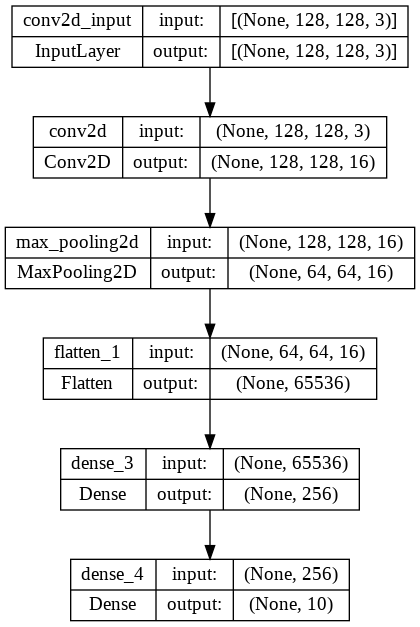

In [ ]:
tf.keras.utils.plot_model(model,to_file = 'modelcnn.png',show_shapes = True)

In [ ]:
model.summary()

Model: "model_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               16777472  
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,780,490
Trainable params: 16,780,490
Non-trainable params: 0
_____________________________________________

In [ ]:
print(27*16 + 16)

448


In [ ]:
print(65536*256 + 256)

16777472


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
epochs = 10
model_fit = model.fit(train_ds, validation_data = val_ds ,epochs = epochs)

Epoch 1/10
96/96 [==============================] - 14s 66ms/step - loss: 6.0654 - accuracy: 0.2907 - val_loss: 1.9609 - val_accuracy: 0.3226
Epoch 2/10
96/96 [==============================] - 6s 64ms/step - loss: 1.7297 - accuracy: 0.4358 - val_loss: 1.7046 - val_accuracy: 0.4545
Epoch 3/10
96/96 [==============================] - 7s 64ms/step - loss: 1.4032 - accuracy: 0.5629 - val_loss: 1.6012 - val_accuracy: 0.4956
Epoch 4/10
96/96 [==============================] - 6s 64ms/step - loss: 1.1257 - accuracy: 0.6405 - val_loss: 1.4610 - val_accuracy: 0.5425
Epoch 5/10
96/96 [==============================] - 8s 75ms/step - loss: 0.8866 - accuracy: 0.7324 - val_loss: 1.4317 - val_accuracy: 0.5689
Epoch 6/10
96/96 [==============================] - 7s 65ms/step - loss: 0.6680 - accuracy: 0.8149 - val_loss: 1.4257 - val_accuracy: 0.5601
Epoch 7/10
96/96 [==============================] - 7s 65ms/step - loss: 0.4900 - accuracy: 0.8686 - val_loss: 1.4152 - val_accuracy: 0.5630
Epoch 8/10
9